In [1]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
%load_ext autoreload
%autoreload 2

### Создадим схему для следующей решетки

In [36]:
g = nx.Graph()

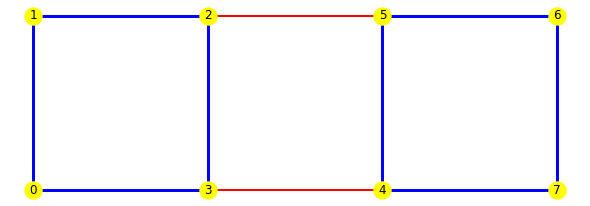

In [47]:
g.add_nodes_from(
    [
    (0, {'pos': (0, 0), 'label': 0}),
    (1, {'pos': (0, 1), 'label': 1}),
    (2, {'pos': (1, 1), 'label': 2}),
    (3, {'pos': (1, 0), 'label': 3}),
    (4, {'pos': (2, 0), 'label': 4}),
    (5, {'pos': (2, 1), 'label': 5}),
    (6, {'pos': (3, 1), 'label': 6}),
    (7, {'pos': (3, 0), 'label': 7}),
    ]
    )
g.add_edges_from(
[
    (0, 1),
    (1, 2),
    (2, 3),
    (0, 3),
    (5, 6),
    (6, 7),
    (7, 4),
    (4, 5),
    (2, 5),
    (3, 4)
])

pos=nx.get_node_attributes(g,'pos')
labels=nx.get_node_attributes(g,'label')
nx.draw(g,
        pos,
        labels=labels,
        node_color='yellow',
        width=[3, 3, 3, 3, 2, 2, 3, 3],
        edge_color=['blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue'])
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.axis('scaled')
plt.show()

In [48]:
square_interactions1 = {(i, (i + 1) % 4): 1 for i in range(4)}
square_interactions2 = {(i + 4, (i + 1) % 4 + 4): 1 for i in range(4)}
connections = {(2, 5): 1, (3, 4): 1}
interactions = {**square_interactions1, **square_interactions2, **connections}

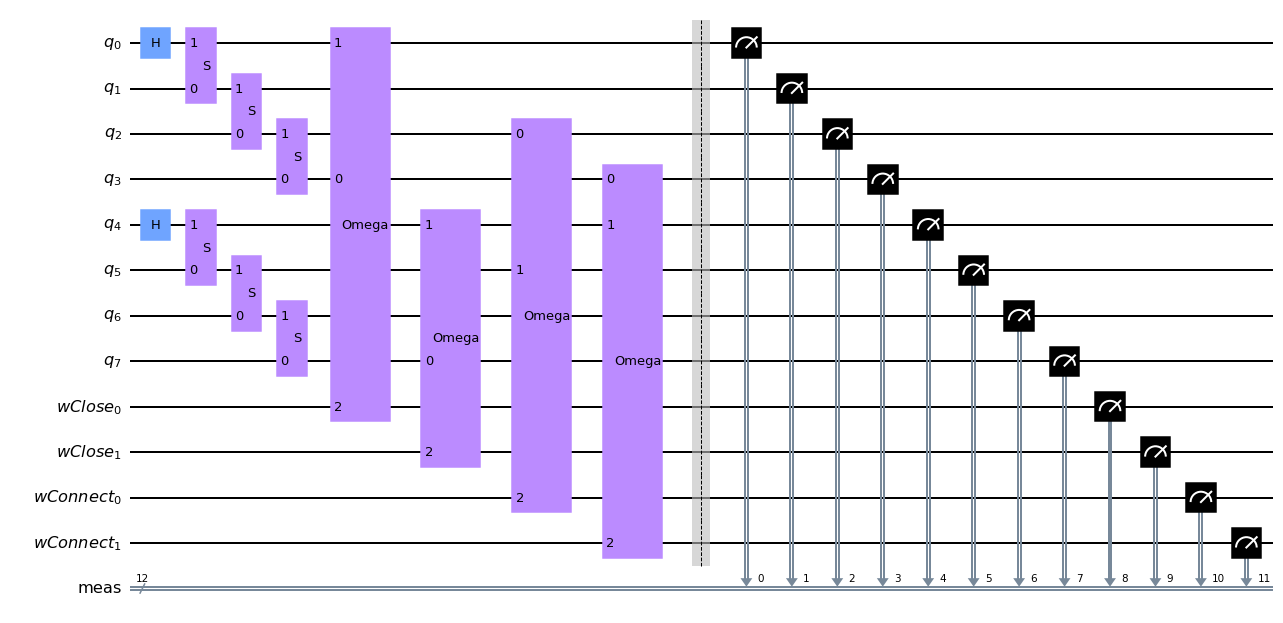

In [49]:
circ = utils.lattice_curcuit([square_interactions1, square_interactions2], connections)
circ.measure_all()
circ.draw('mpl')

In [50]:
backend = qiskit.BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circ, backend, shots=65536)
pre_result = job.result().get_counts()
result = utils.process_lattice_result(pre_result, 4)

In [51]:
total_good = sum(result.values())
comparison = [value/total_good - utils.Pr(utils.spins_from_string01(key[::-1]), interactions)\
              for key, value in result.items()]

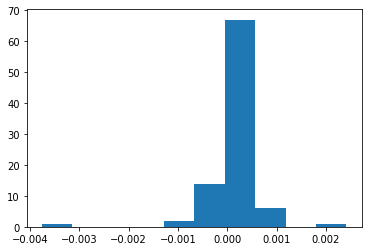

In [52]:
plt.hist(comparison)
plt.show()